# ***Business Problem***
XYZ wants to find out if a customer has churned out or is still associated with the bank.

# ***Data Science Problem***
Build a **Classification Engine** which classifies a customer as Churned Out / Associated on the basis of various features like credit score, balance, tenure, gender, etc.


Since it's a classification problem: We will use ***Logistic Regression***

## ***Step 1: Import Libraries***

In [3]:
#Import Libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## ***Step 2: Load Data***

In [5]:
from google.colab import files
uploaded = files.upload()

import io

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [9]:
data = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']), index_col = 'RowNumber')

## ***Step 3: Understanding Data: Insights on Shape, Size and Stats***


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [11]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


Based on the given dataset, we derive that:

## *Target Variable (Y) : Exited*
## *Independent Variable (X): Features like CreditScore, Gender, Geography etc.*



In [17]:
#Printing numerical and categorical columns in the dataset

num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print('Categorical Columns:\n ', categ_col)
print('************************************************************************************************')
print('Numerical Columns:\n ', num_col)

Categorical Columns:
  Index(['Surname', 'Geography', 'Gender'], dtype='object')
************************************************************************************************
Numerical Columns:
  Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


## ***Step 4: Data Preprocessing: Prepare the data for EDA***


In [19]:
#Droping Columns based on Personal Domain Knowledge that will not contribute to the Y Variable

data.drop(['Surname', 'CustomerId'], axis = 1, inplace = True)

In [20]:
#One Hot Encoding of 'Geography' and Label Encoding of 'Gender'
# Geography had values 'France, Germany, Spain' and Gender had values Male/Female

geoDummy = pd.get_dummies(data, prefix = 'Geo', columns = ['Geography'])
genDummy = geoDummy.replace(to_replace = {'Gender': {'Male' : 0, 'Female': 1}})


In [21]:
dataEncoded = genDummy
dataEncoded.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0


## ***Step 5: Exploratory Data Analysis***


In [22]:
#Check the distribution of Y Variable to check if it is case of an imbalanced dataset

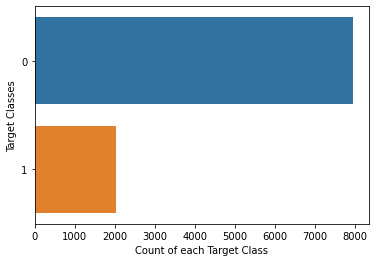

In [26]:
sns.countplot(y = dataEncoded['Exited'], data = dataEncoded)
plt.xlabel('Count of each Target Class')
plt.ylabel('Target Classes')
plt.show()

Inference: Very High Class Imbalance since Ratio of Associated : Churned is 8000:2000 which is 4:1

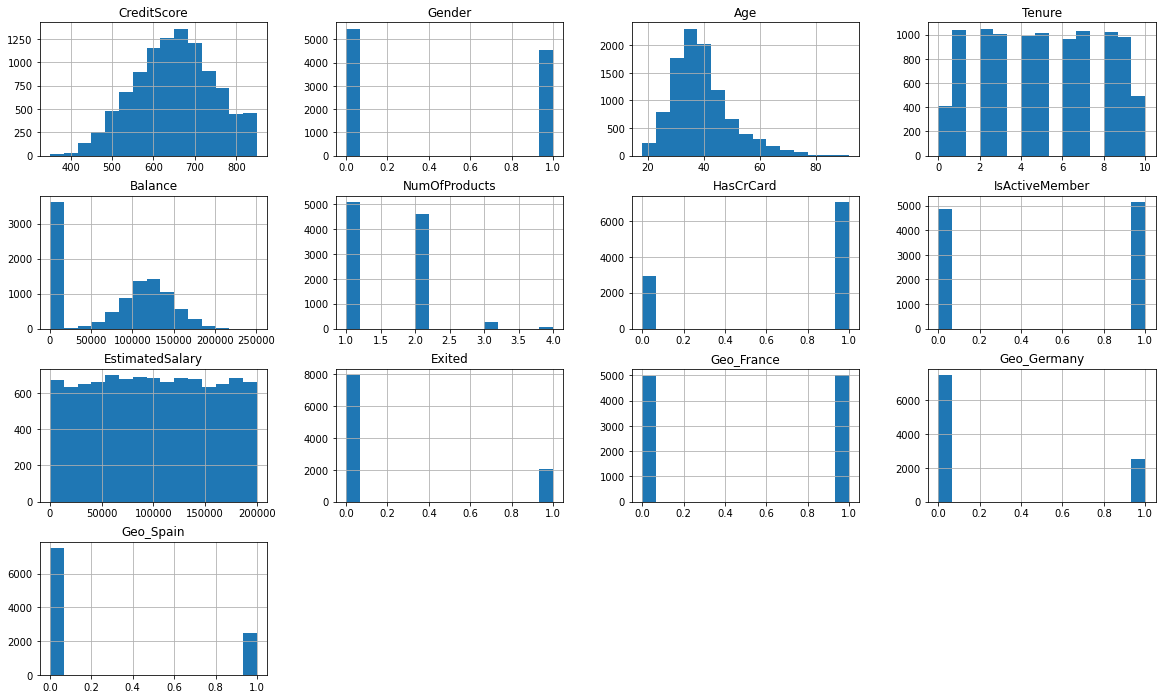

In [29]:
#Check Distribution of All Independent Variables (Features)

dataEncoded.hist(figsize=(20,12), bins = 15)
plt.title('Features Distribution')
plt.show()

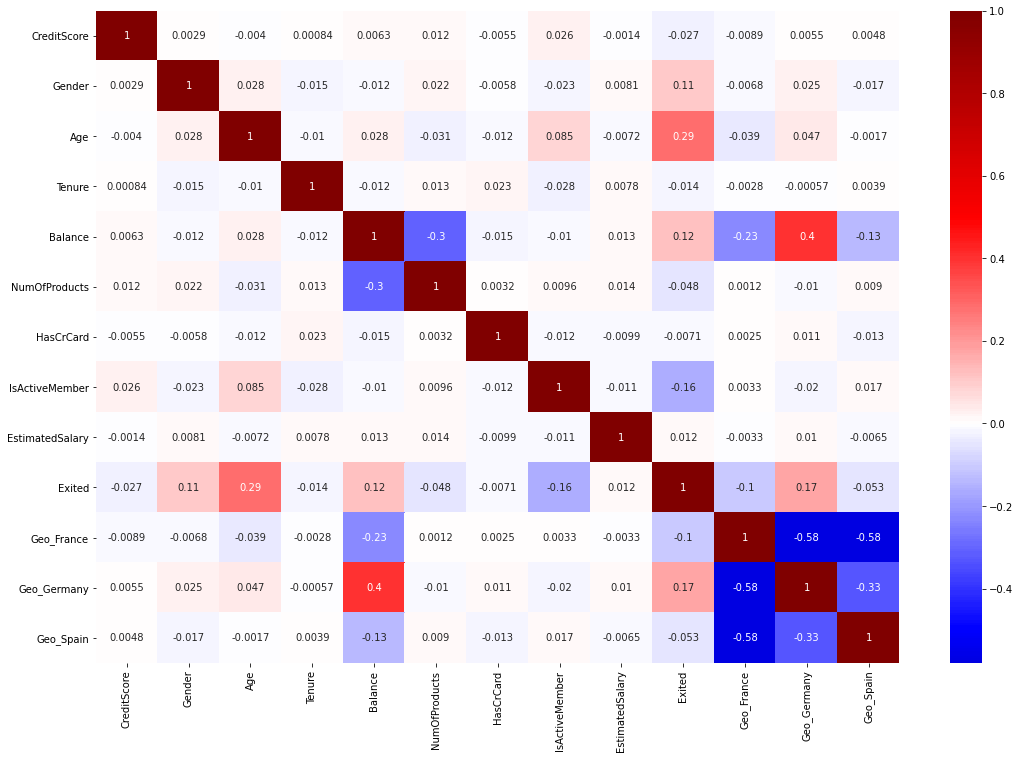

In [36]:
#MultiCollinearity of Features : Relational Dependencies among the Features

plt.figure(figsize = (18, 12))
sns.heatmap(dataEncoded.corr(), annot = True, cmap = 'seismic', center = 0)

Inference: No cases of multi collinearity, All the features can be taken into consideration

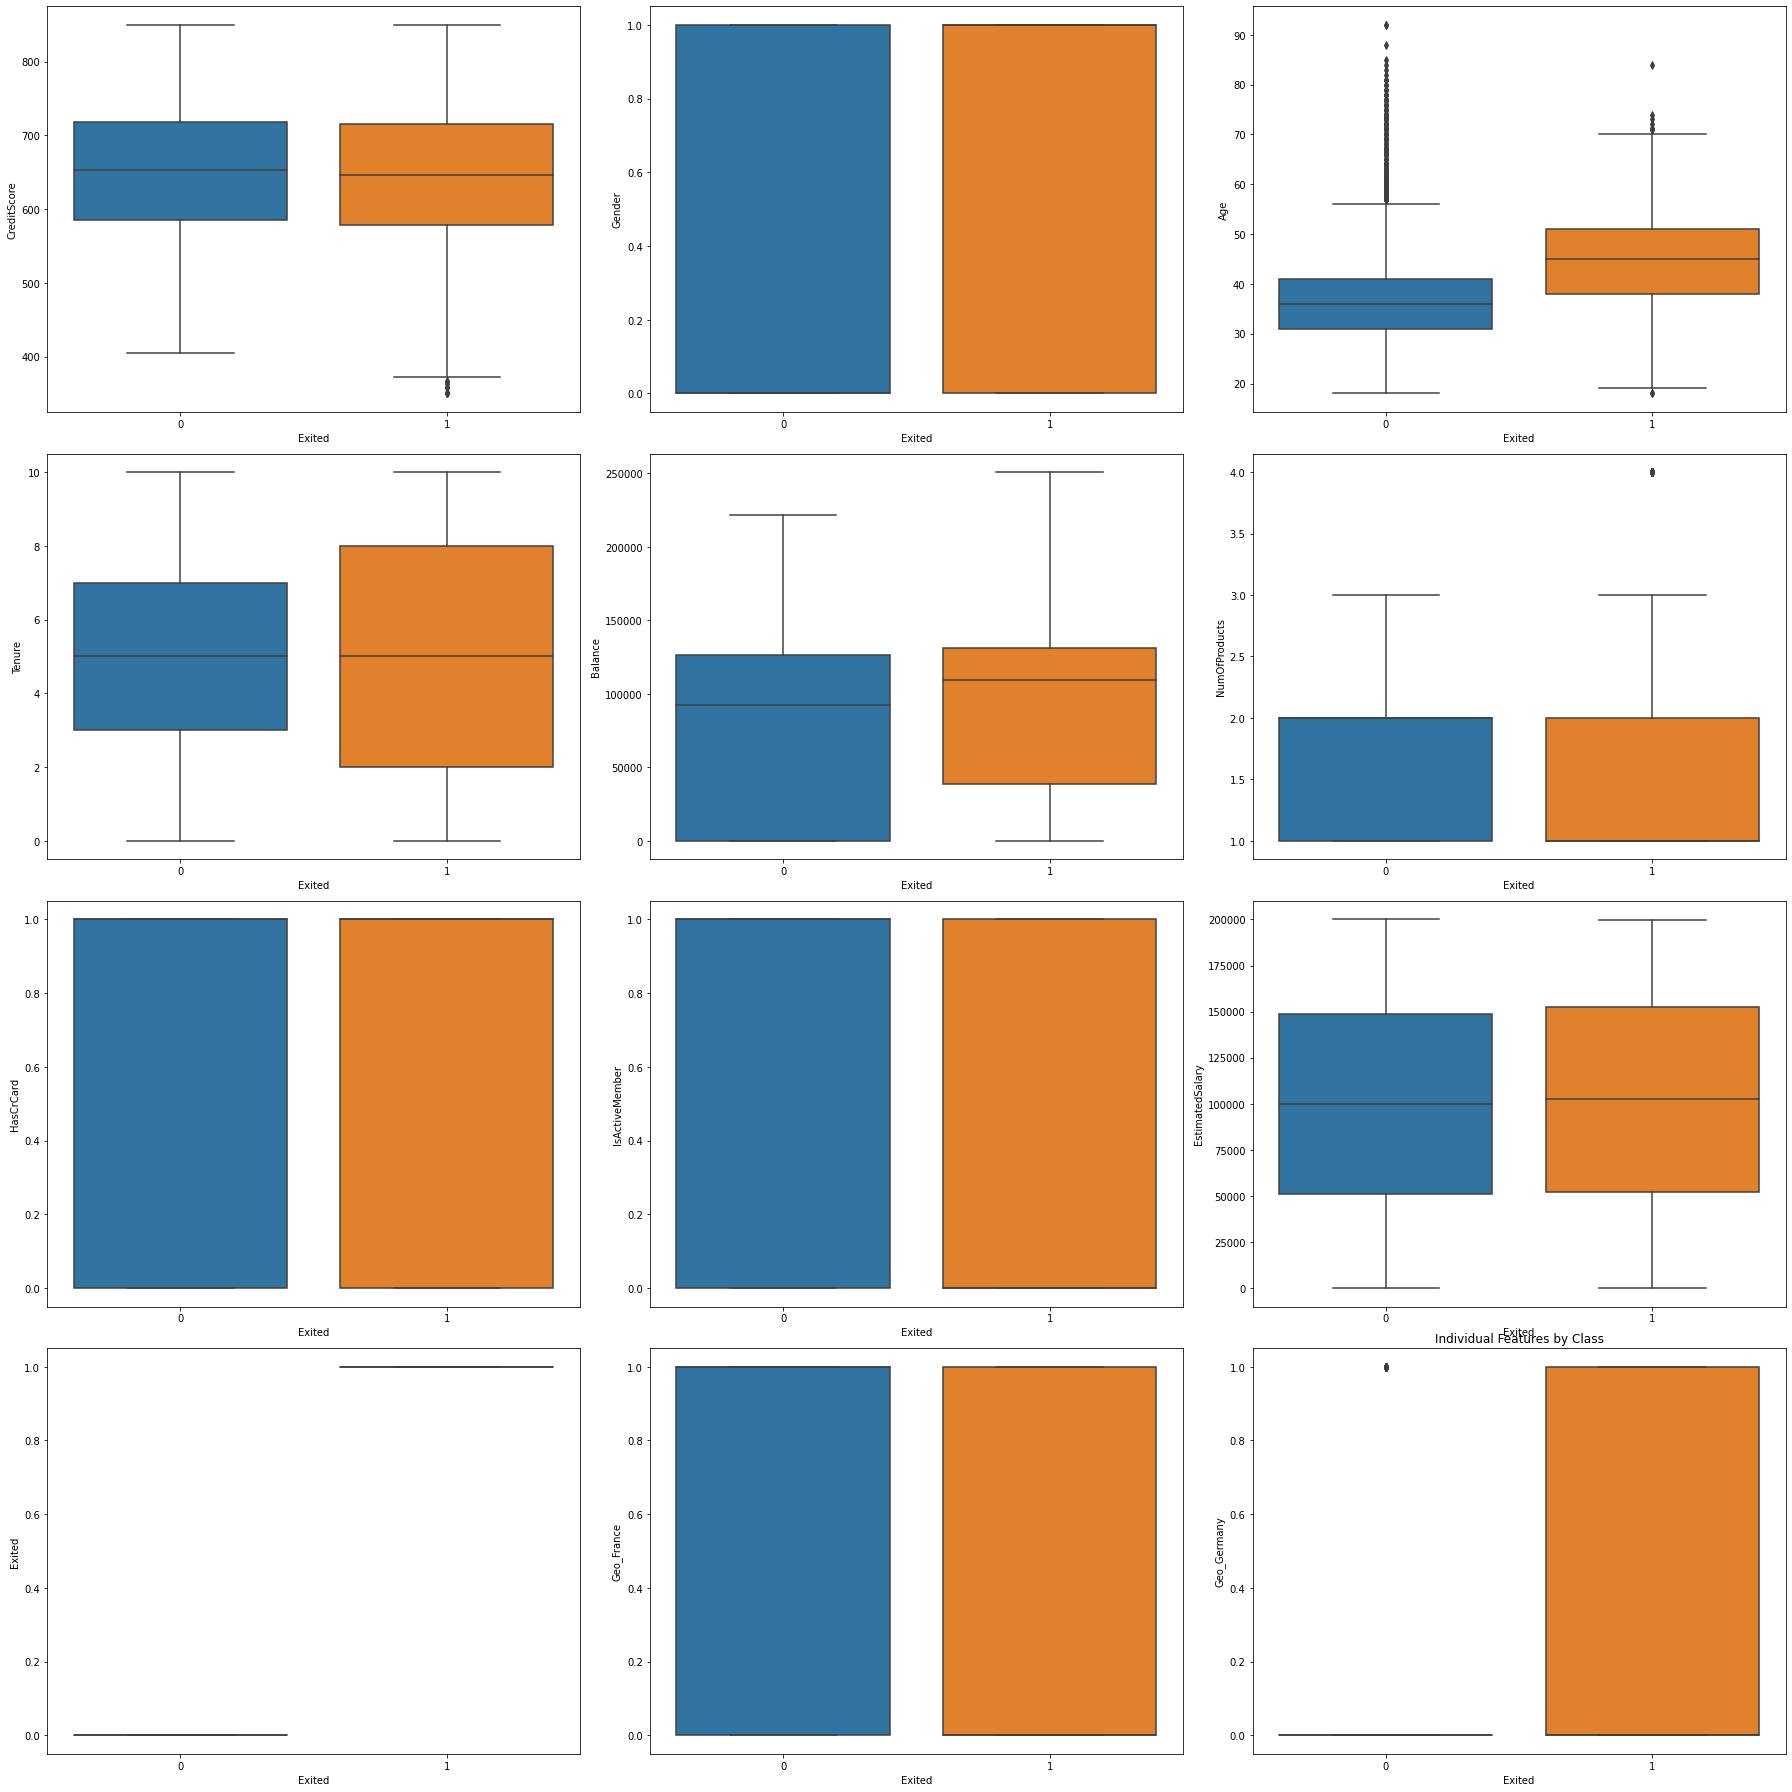

In [39]:
# Distribution of y variable corresponding to each feature, dependency of y on every x individually

fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (25,25))

row = 0
col = 0
for i in range(len(dataEncoded.columns)-1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = dataEncoded['Exited'], y = dataEncoded[dataEncoded.columns[i]], ax = axes)
    col += 1

plt.tight_layout()
plt.title('Individual Features by Class')
plt.show()

## ***Step 6: Model Building***

In [40]:
# Splitting Dataset into Y and X series

X = dataEncoded.drop(['Exited'], axis = 1)
y = dataEncoded['Exited']

In [41]:
# Splitting X, y variables into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 105)

In [43]:
#Feature Scaling to bring all the independent variables to the same scale.

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

###***Logistic Regression***

In [44]:
#Defining Logistic Regression and train the model as per our data

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## ***Step 6: Prediction and Evaluation of Performance Metrics***

In [46]:
# Predict Class
y_pred = lr.predict(X_test)

#Predict Probability of Class
y_predProb = lr.predict_proba(X_test)



array([[0.79890985, 0.20109015],
       [0.94980288, 0.05019712],
       [0.97239031, 0.02760969],
       ...,
       [0.92447612, 0.07552388],
       [0.37639397, 0.62360603],
       [0.61075991, 0.38924009]])

### ***Conforming Performance Metrics***

#### ***1. Accuracy***

In [47]:
score = lr.score(X_test, y_test)
print("Accuracy Score: ", score)

Accuracy Score:  0.8093939393939394


#### ***2.Confusion Matrix***

In [48]:
actual = y_test
prediction = y_pred

confMatrix = confusion_matrix(actual, prediction)
print('Confusion Matrix: \n', confMatrix)

Confusion Matrix: 
 [[2535  112]
 [ 517  136]]


#### ***Summary of Confusion Matrix:***

The Rows in the confusion matrix are the count of Predicted O's and 1's
The Columns in the confusion matrix are the count of Actual 0's and 1'

Through Confusion Matrix, we inferred that out of a total of 3040 samples of 0's, the model was able to predict 2535 samples of 0's correctly.
Thus 2535/3040 = 83.38% correctly

On the other hand, out of a total 260 samples of 1's, 136 was correctly predicted while 112 was incorrectly predicted. Thus acccuracy for 1's sample = 52.30% only correctly.

This happened because of the High Class Imbalance which needs to be eliminated.

#### ***3.Accuracy, Precision, F1 Score, Recall***

In [49]:
print("Classification Report: \n", classification_report(actual, prediction))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2647
           1       0.55      0.21      0.30       653

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.77      0.81      0.77      3300



### ***Handling Class Imbalance***

#### ***Over Sampling***

In [50]:
from imblearn.over_sampling import RandomOverSampler

X1 = dataEncoded.drop(['Exited'], axis = 1)
y1 = dataEncoded['Exited']

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X1, y1)


In [63]:
(unique, counts) = np.unique(y_ros, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 7963]
 [   1 7963]]


In [73]:
def build_model(X_train, y_train, class_weight = None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 508)

    #Feature Scaling to bring all the independent variables to the same scale.
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    #Predict Probability of Class
    y_predProb = lr.predict_proba(X_test)
    
    actual = y_test
    prediction = y_pred

    print("Confusion Matrix:\n", confusion_matrix(actual, prediction))
    print("Accuracy Score:\n", accuracy_score(actual, prediction))
    print("Classification Report:\n", classification_report(actual, prediction))

    return lr


In [66]:
def evaluateModel(actual, prediction):
    print("Confusion Matrix:\n", confusion_matrix(actual, prediction))
    print("Accuracy Score:\n", accuracy_score(actual, prediction))
    print("Classification Report:\n", classification_report(actual, prediction))


#### ***Building New Model that is NOT Facing Class Imbalance***

In [74]:
lr_model = build_model(X_ros, y_ros)

Confusion Matrix:
 [[2532   86]
 [ 531  151]]
Accuracy Score:
 0.813030303030303
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2618
           1       0.64      0.22      0.33       682

    accuracy                           0.81      3300
   macro avg       0.73      0.59      0.61      3300
weighted avg       0.79      0.81      0.78      3300

